### Ordinary Least Squares 
---

Ordinary least squares regression minimizes the residual sum of squares (RSS) to fit the data:

$$ \text{minimize:}\; {\rm RSS} = \sum_{i=1}^n (y_i - \hat{y}_i)^2 = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p X_{ij}\beta_j\right)\right)^2 $$

where our model predictions for $y$ are based on the sum of the $\beta_0$ intercept and the products of $\beta_j$ with $X_{ij}$.

Alternatively, in matrix notation using the predictor matrix $X$, the residuals $\epsilon$ and the vector of beta coefficients $\beta$ we write the same equation as

$$ \text{minimize:}\; {\rm RSS} = \epsilon^T \epsilon = (y - X\beta)^T (y - X\beta ) $$

The derivative with respect to all the beta coefficients becomes

$$ \frac{\partial RSS}{\partial \beta} = -2X^T y + 2X^T X\beta $$

Setting equal to zero and solving for the beta coefficient vector gives

$$\beta = (X^T X)^{-1}X^T y $$

### The Ridge penalty

---

Ridge regression adds the sum of the squared (non-intercept!) $\beta$ values to the loss function

$$ \text{minimize:}\; {\rm RSS+Ridge} = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p x_{ij}\beta_j\right)\right)^2 + \lambda_2\sum_{j=1}^p \beta_j^2$$

where $\beta_j^2$ is the squared coefficient for variable $X_j$.

$\sum_{j=1}^n \beta_j^2$ is the sum of these squared coefficients for every variable we have in our model. This does **not** include the intercept $\beta_0$.

$\lambda_2$ is a constant for the _strength_ of the regularization parameter. The higher this value, the greater the impact of this new component in the loss function. If this were zero, then we would revert back to just the least squares loss function. If this were, say, a billion, then the residual sum of squares component would have a much smaller effect on the loss/cost than the regularization term.

With the penalty added the RSS is referred to as the **penalized residual sum of squares (PRSS)**. In matrix format the Ridge PRSS is:

$$ \text{Ridge PRSS} = (y - X\beta)^T (y - X\beta) + \lambda_2 \; \left\|\beta\right\|^2_2 $$

where $\left\|\beta\right\|_2^2$ is the so-called L2-norm of the coefficient vector (again, excluding intercept).

The derivative with respect to all the beta coefficients becomes

$$ \frac{\partial PRSS}{\partial \beta} = -2X^T y + 2X^T X\beta + 2\lambda_2 \beta$$

Setting equal to zero and solving for the beta coefficient vector gives

$$\beta = (X^T X + \lambda_2\mathbb{1})^{-1}X^T y $$

# * in another words, Ridge PRSS = RSS + MSE

## The Lasso penalty

---

The Lasso regression takes a different approach. Instead of adding the sum of _squared_ $\beta$ coefficients to the RSS, one adds the sum of the _absolute values_ of the $\beta$ coefficients:

$$ \text{minimize:}\; {\rm RSS + Lasso} = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p X_{ij}\beta_j\right)\right)^2 + \lambda_1\sum_{j=1}^p |\beta_j|$$

where $|\beta_j|$ is the absolute value of the $\beta$ coefficient for variable $X_j$ (this is often called the L1-norm). $\lambda_1$ is again the strength of the regularization penalty component in the loss function. 

**In matrix format the Lasso PRSS is:**

$$ \text{Lasso PRSS} = (y - X\beta)^T (y - X\beta) + \lambda_1 \; \left\|\beta\right\|_1 $$

where 

$$\left\|\beta\right\|_1=\sum_{j=1}^p |\beta_j|$$ 

Unlike the Ridge, however, there is not a closed-form solution for the Lasso beta coefficients.

# * Lasso PRSS = RSS + MAE

## Elastic Net penalty

---

Elastic Net is a combination of the Lasso and the Ridge regularizations. It adds *both* penalties to the loss function:

$$ \begin{eqnarray*}
\text{minimize:}\; {\rm RSS + Ridge + Lasso} &=& \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p X_{ij}\beta_j\right)\right)^2 \\
&&+ \lambda_1\sum_{j=1}^p |\beta_j| + \lambda_2\sum_{j=1}^p \beta_j^2
\end{eqnarray*}
$$

In the elastic net, the effect of the Ridge versus the Lasso is balanced by the two $\lambda$-parameters. 

---

#### - The Ridge is best suited to deal with multicollinearity. Lasso also deals with multicollinearity between variables, but in a more brutal way (it "zeroes out" the less effective variable).

#### - The Lasso is particularly useful when you have redundant or unimportant variables. If you have 1000 variables in a dataset the Lasso can perform "feature selection" automatically for you by forcing coefficients to be zero.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
wine = pd.read_csv(
    '/Users/paxton615/GA/resource-datasets/wine_data/winequality_merged.csv')
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [4]:
print(wine.red_wine.value_counts()) #1 is red wine, 0 is white

0    4898
1    1599
Name: red_wine, dtype: int64


In [8]:
wine.columns = [x.lower().replace(' ', '_') for x in wine.columns]
wine.columns

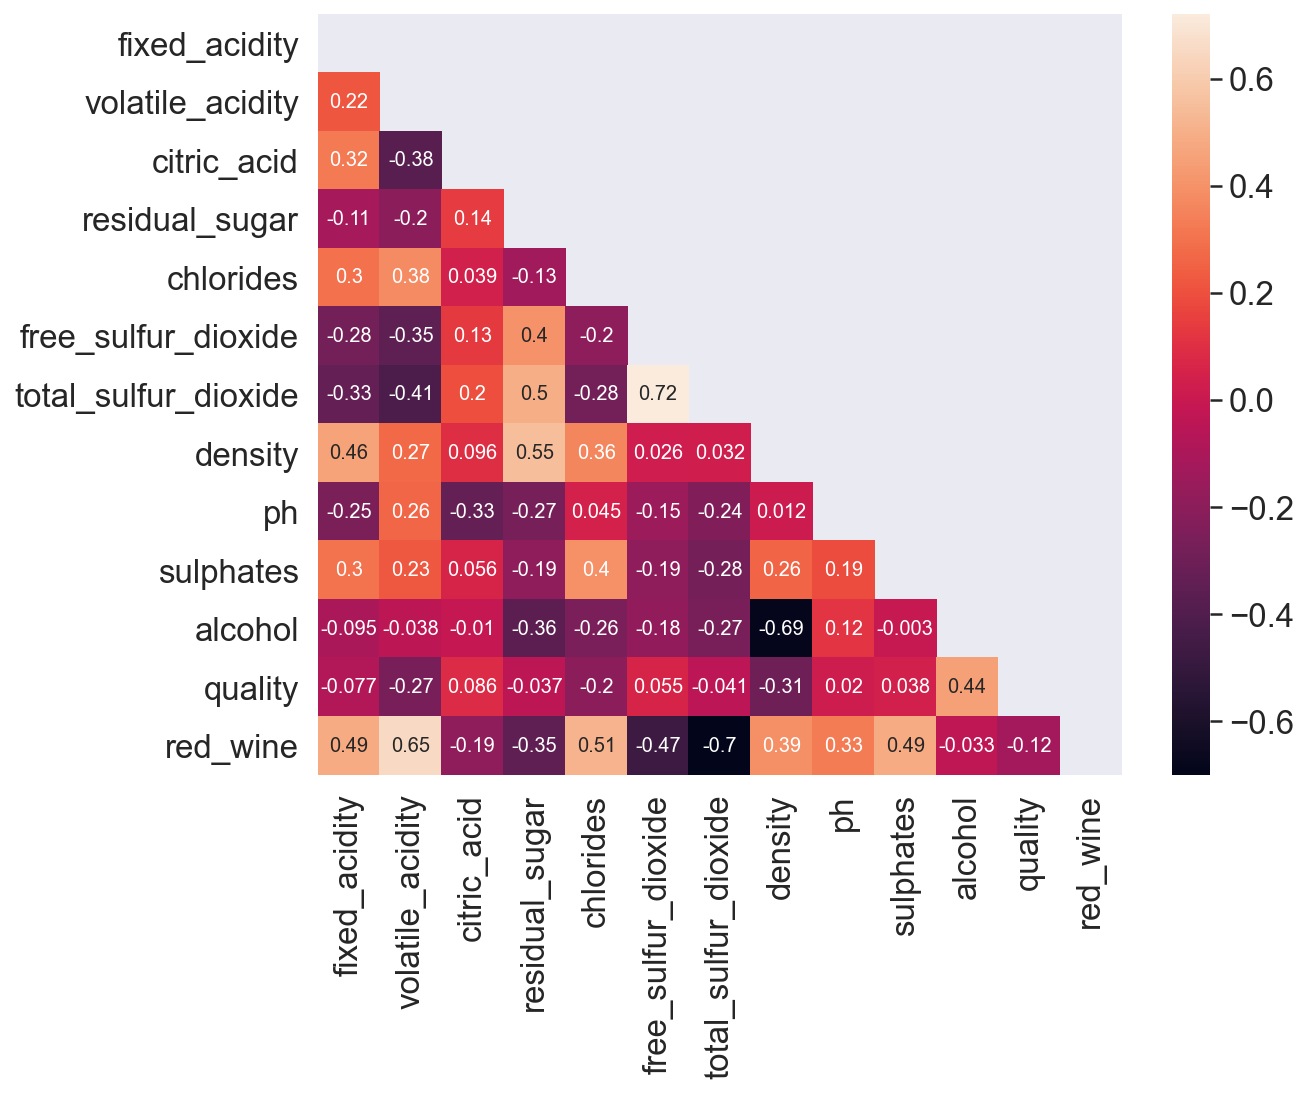

In [10]:
fig, ax = plt.subplots(figsize=(9, 7))

wine_corr = wine.corr()
mask = np.zeros_like(wine_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(wine_corr, mask=mask, annot=True, ax=ax)
plt.show()

#### prepare data

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
df = wine.copy()

y = df.pop('quality')

x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=1)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape )

(5197, 12) (1300, 12) (5197,) (1300,)


In [22]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
X_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

In [28]:
X_train.describe().iloc[1:3,:]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,red_wine
mean,-6.672020e-16,-2.136277e-20,2.439842e-16,4.272553e-19,1.350554e-16,1.113641e-16,-5.937781e-17,3.950928e-14,1.533686e-16,-4.777997e-16,1.388067e-15,3.176857e-16
std,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00,1.000096e+00


In [29]:
X_test.describe().loc[['mean','std'],:]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,red_wine
mean,-0.013619,-0.028778,0.024026,0.038238,-0.050498,-0.004676,0.032996,0.002740,-0.008882,-0.040971,-0.021594,-0.050927
std,1.003063,0.995719,1.005002,1.039889,0.934571,0.964362,0.992696,1.014083,1.013424,0.952416,1.012480,0.969273


#### Model fitting

In [30]:
from sklearn.model_selection import cross_val_score

In [44]:
def model_fitter(model, x_train, y_train, x_test, y_test, cv=5):
    model.fit(x_train, y_train)
    cv_score = cross_val_score(model, x_train, y_train, cv=cv)
    mean_cv_score = cv_score.mean()
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    print('cv_score:','\n',cv_score,'\n','mean_cv_score:', '\n',mean_cv_score,'\n','train_score','\n', train_score,'\n','test_score','\n', test_score)

In [32]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [45]:
model = LinearRegression()
model_fitter(model, X_train, y_train, X_test, y_test)

cv_score: 
 [0.30505411 0.22588717 0.32153897 0.30235836 0.31392525] 
 mean_cv_score: 
 0.2937527728500178 
 train_score 
 0.3003791288683392 
 test_score 
 0.27724103468062944


In [46]:
model = Ridge(alpha=1.0)
model_fitter(model, X_train, y_train, X_test, y_test)

cv_score: 
 [0.30515645 0.22587874 0.32165224 0.30230775 0.31389322] 
 mean_cv_score: 
 0.29377768266573445 
 train_score 
 0.3003789080127256 
 test_score 
 0.2772344559877724


In [47]:
model = Lasso(alpha=0.01)
model_fitter(model, X_train, y_train, X_test, y_test)

cv_score: 
 [0.29764765 0.21985379 0.32400688 0.2922791  0.30406629] 
 mean_cv_score: 
 0.2875707436048437 
 train_score 
 0.29284760242486385 
 test_score 
 0.2691735441408075


In [48]:
model = ElasticNet(alpha=0.1, l1_ratio=0.05)
model_fitter(model, X_train, y_train, X_test, y_test)

cv_score: 
 [0.29677412 0.22370872 0.32356363 0.28731345 0.30114931] 
 mean_cv_score: 
 0.28650184588027433 
 train_score 
 0.2909751810655905 
 test_score 
 0.2707506035286861


#### Determining the best regularization strength with cross validation

In [53]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

- 找出最优alpha，带回lasso模型，对比score

In [73]:
model = LassoCV(alphas=np.logspace(-5, 5, 100), cv=5)
model.fit(X_train, y_train)
print(model.alpha_,'\n', model.intercept_,'\n', model.coef_)

0.0005214008287999684 
 5.825476236290178 
 [ 0.08325401 -0.24861367 -0.0093191   0.27615419 -0.02292121  0.08678971
 -0.07536901 -0.27052652  0.05890734  0.10614386  0.29181316  0.15240837]


In [71]:
model = Lasso(alpha=0.01)
model_fitter(model, X_train, y_train, X_test, y_test)

cv_score: 
 [0.29764765 0.21985379 0.32400688 0.2922791  0.30406629] 
 mean_cv_score: 
 0.2875707436048437 
 train_score 
 0.29284760242486385 
 test_score 
 0.2691735441408075


In [72]:
model = Lasso(alpha=0.0005214)
model_fitter(model, X_train, y_train, X_test, y_test)

cv_score: 
 [0.30576561 0.22585877 0.32229032 0.30174049 0.31348816] 
 mean_cv_score: 
 0.29382867060203466 
 train_score 
 0.3003423101573439 
 test_score 
 0.27694623942228913


- 找出最优alpha，带回lasso模型，对比score